In [65]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def plot_ap(res):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_xlabel('threshold [m]', fontsize=14)
    ax.set_ylabel('Average Precision', fontsize=14)

    for cls, ap_dict in res['ap'].items():
        thrs = [t.replace('m', '') for t in ap_dict.keys()]
        ax.plot(thrs, ap_dict.values(), label=cls)
    
    ax.legend(fontsize=16, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.show()
    
    
def plot_precision_recall(res):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlabel('recall', fontsize=14)
    ax.set_ylabel('precision', fontsize=14)

    for cls in res['precision'].keys():
        rec_dict = res['recall'][cls]
        prec_dict = score_dict['0.5']
        thrs = [t.replace('m', '') for t in prec_dict.keys()]
        ax.plot(thrs, prec_dict.values(), label=cls)
    
    ax.legend(fontsize=16, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.show()

In [39]:
res_cls = read_json('data/result_IA_vs_videocoding/results_cls.json')
res_det = read_json('data/result_IA_vs_videocoding/results_det.json')
res_seg = read_json('data/result_IA_vs_videocoding/results_seg.json')
res_videocoder = read_json('data/result_IA_vs_videocoding/results_videocoder.json')

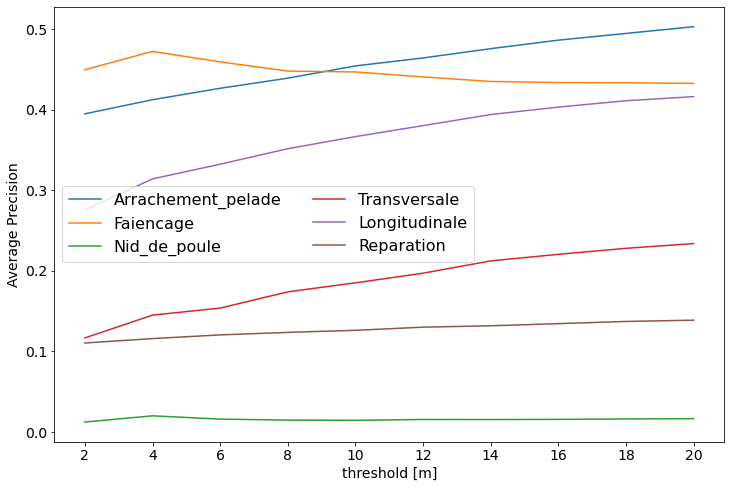

In [22]:
plot_ap(res_cls)

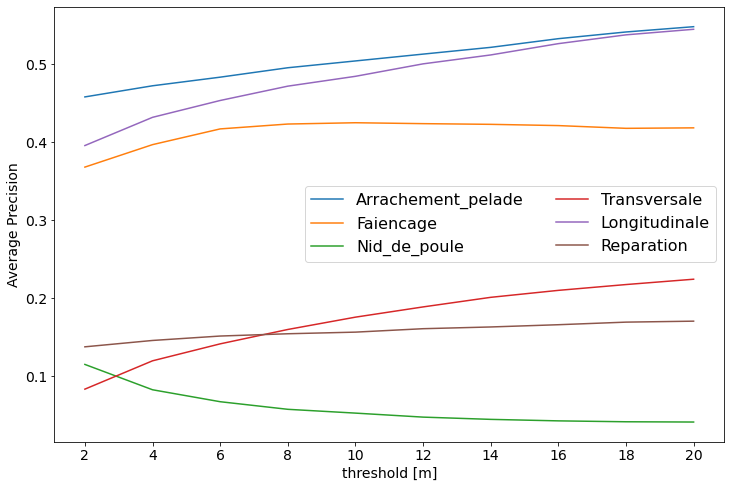

In [23]:
plot_ap(res_det)

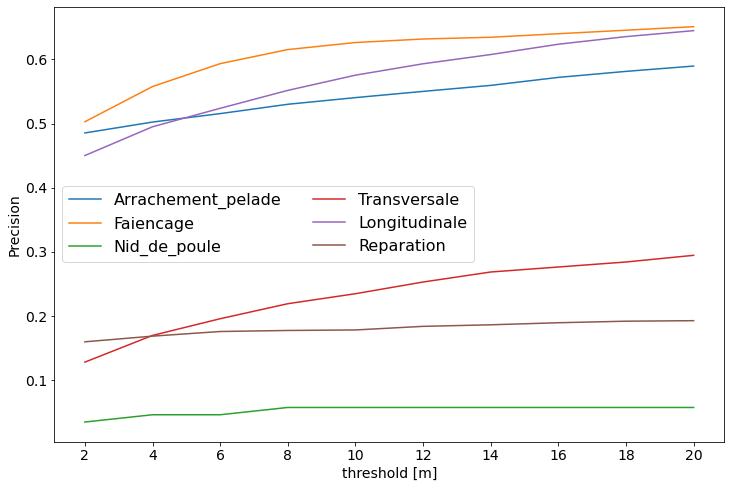

In [20]:
plot_precision_recall(res_det, 'precision', 'Precision')


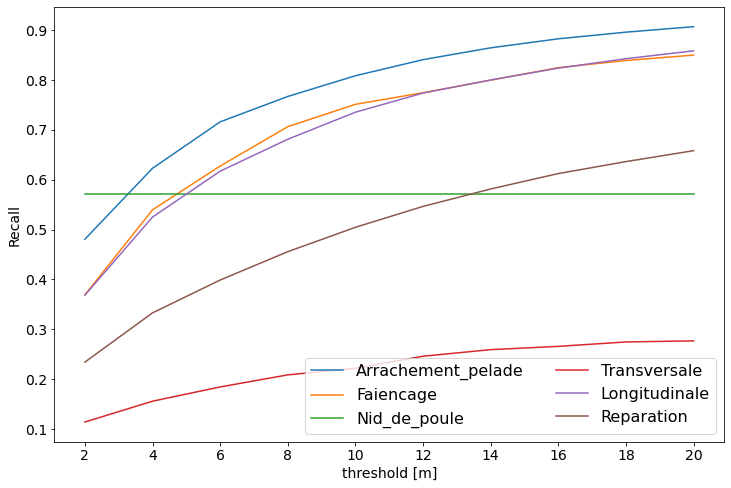

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('threshold [m]', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)

for cls, score_dict in res_det['recall'].items():
    prec_dict = score_dict['0.5']
    thrs = [t.replace('m', '') for t in prec_dict.keys()]
    ax.plot(thrs, prec_dict.values(), label=cls)
    
ax.legend(fontsize=16, ncol=2)
ax.tick_params(axis='both', which='major', labelsize=14)

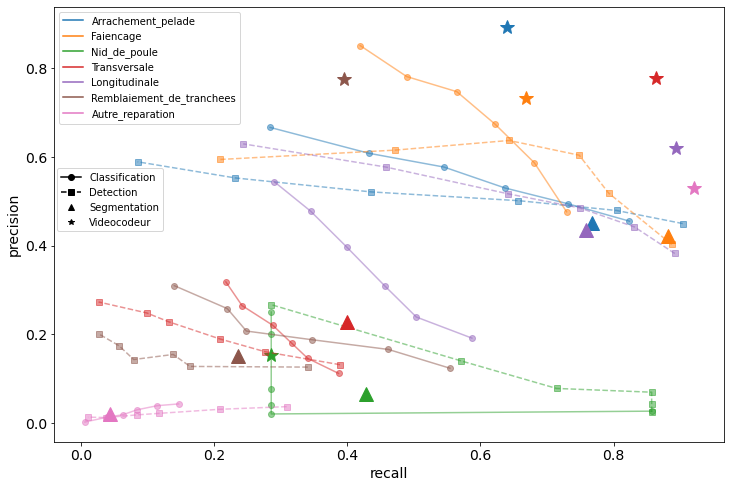

In [91]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('recall', fontsize=14)
ax.set_ylabel('precision', fontsize=14)

class_legend = []

for cls in res_cls['precision'].keys():
    recall_list_cls = [ res_cls['recall'][cls][score]['6m'] for score in res_cls['recall'][cls].keys() ]
    precision_list_cls = [ res_cls['precision'][cls][score]['6m'] for score in res_cls['recall'][cls].keys() ]
    line, = ax.plot(recall_list_cls, precision_list_cls, marker='o', alpha=0.5)
    
    recall_list_det = [ res_det['recall'][cls][score]['6m'] for score in res_det['recall'][cls].keys() ]
    precision_list_det = [ res_det['precision'][cls][score]['6m'] for score in res_det['recall'][cls].keys() ]
    ax.plot(recall_list_det, precision_list_det, marker='s', color=line.get_color(), linestyle='--', alpha=0.5)
    
    seg_recall = [res_seg['recall'][cls]['0.0']['6m']]
    seg_precision = [res_seg['precision'][cls]['0.0']['6m']]
    ax.plot(seg_recall, seg_precision, color=line.get_color(), marker='^', markersize=14)

    vid_recall = [res_videocoder['recall'][cls]['6m']]
    vid_precision = [res_videocoder['precision'][cls]['6m']]
    ax.plot(vid_recall, vid_precision, color=line.get_color(), marker='*', markersize=14)
    
    class_legend.append(mlines.Line2D([], [], color=line.get_color(), marker=None, label=cls))

cl = ax.legend(handles=class_legend, loc='upper left')
ax.add_artist(cl)

cls_legend = mlines.Line2D([], [], color='black', marker='o', label='Classification')
det_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Detection')
seg_legend = mlines.Line2D([], [], color='black', marker='^', linestyle='', label='Segmentation')
vid_legend = mlines.Line2D([], [], color='black', marker='*', linestyle='', label='Videocodeur')
ax.legend(handles=[cls_legend, det_legend, seg_legend, vid_legend], bbox_to_anchor=(0.17, 0.64))
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()